In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = sns.load_dataset('mpg')

In [4]:
X = df[['horsepower', 'weight']]
y = df['mpg']

# Create Pipeline with SimpleImputer, PolynomialFeatures, and LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(SimpleImputer(), 
                         PolynomialFeatures(2),
                         LinearRegression())

pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [6]:
print("intercept: {}".format(pipeline.named_steps['linearregression'].intercept_))
print("slope: {}".format(pipeline.named_steps['linearregression'].coef_))

intercept: 64.54575323492904
slope: [ 0.00000000e+00 -2.14029916e-01 -1.26427053e-02  3.56755138e-04
  1.70932479e-05  9.11099302e-07]


In [7]:
pipeline.score(X, y)

0.7438675396663639

# Prediction
## Example

In [195]:
df_prediction = pd.DataFrame([[120, 2700], [120, 2800], [200, 3600]])
pipeline.predict(df_prediction)

array([22.04425921, 21.48621227, 14.61122192])

## The pipeline can handle NaNs

In [196]:
df_prediction = pd.DataFrame([[120, 2700], [np.NaN, 2800], [200, np.NaN]])
pipeline.predict(df_prediction)

array([22.04425921, 22.82321494, 16.64962736])

# Pairplot

<IPython.core.display.Javascript object>


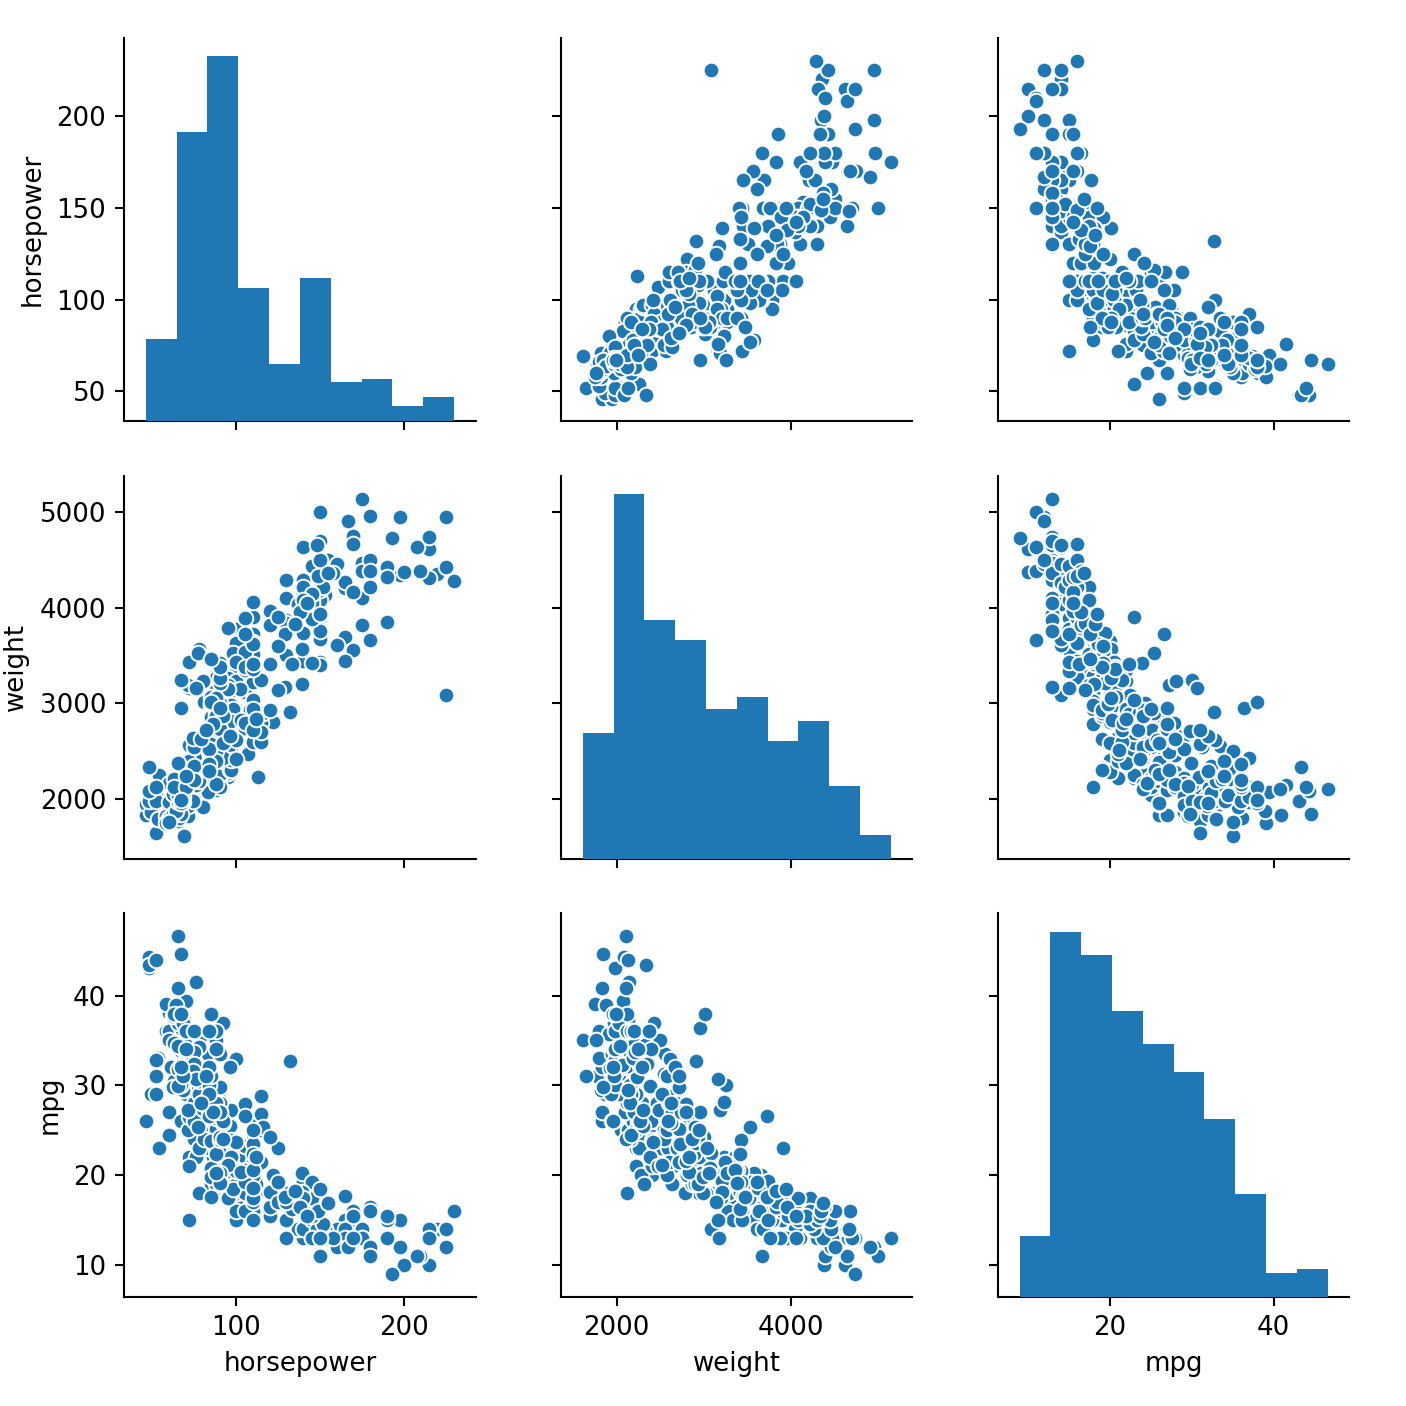

C:\Users\peer.kueppers\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\peer.kueppers\AppData\Roaming\Python\Python36\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [197]:
sns.pairplot(df[['horsepower', 'weight','mpg']])

# Visualization

<IPython.core.display.Javascript object>


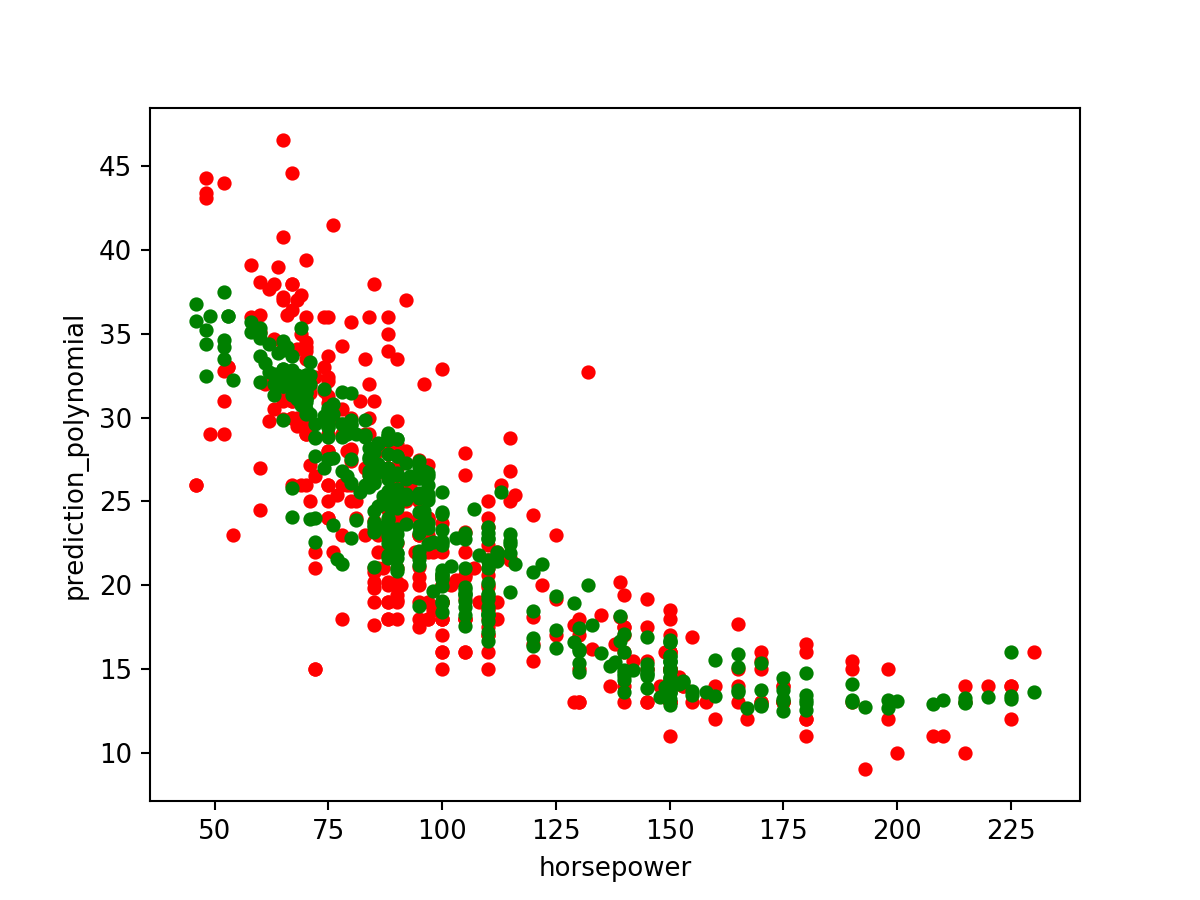

In [200]:
    df_viz = df.copy()
    df_viz['prediction_polynomial'] = pipeline.predict(X)
    ax1 = df_viz.plot(kind='scatter', x='horsepower', y='mpg', color='r')    
    ax2 = df_viz.plot(kind='scatter', x='horsepower', y='prediction_polynomial', color='g', ax=ax1)
    plt.show()

<IPython.core.display.Javascript object>


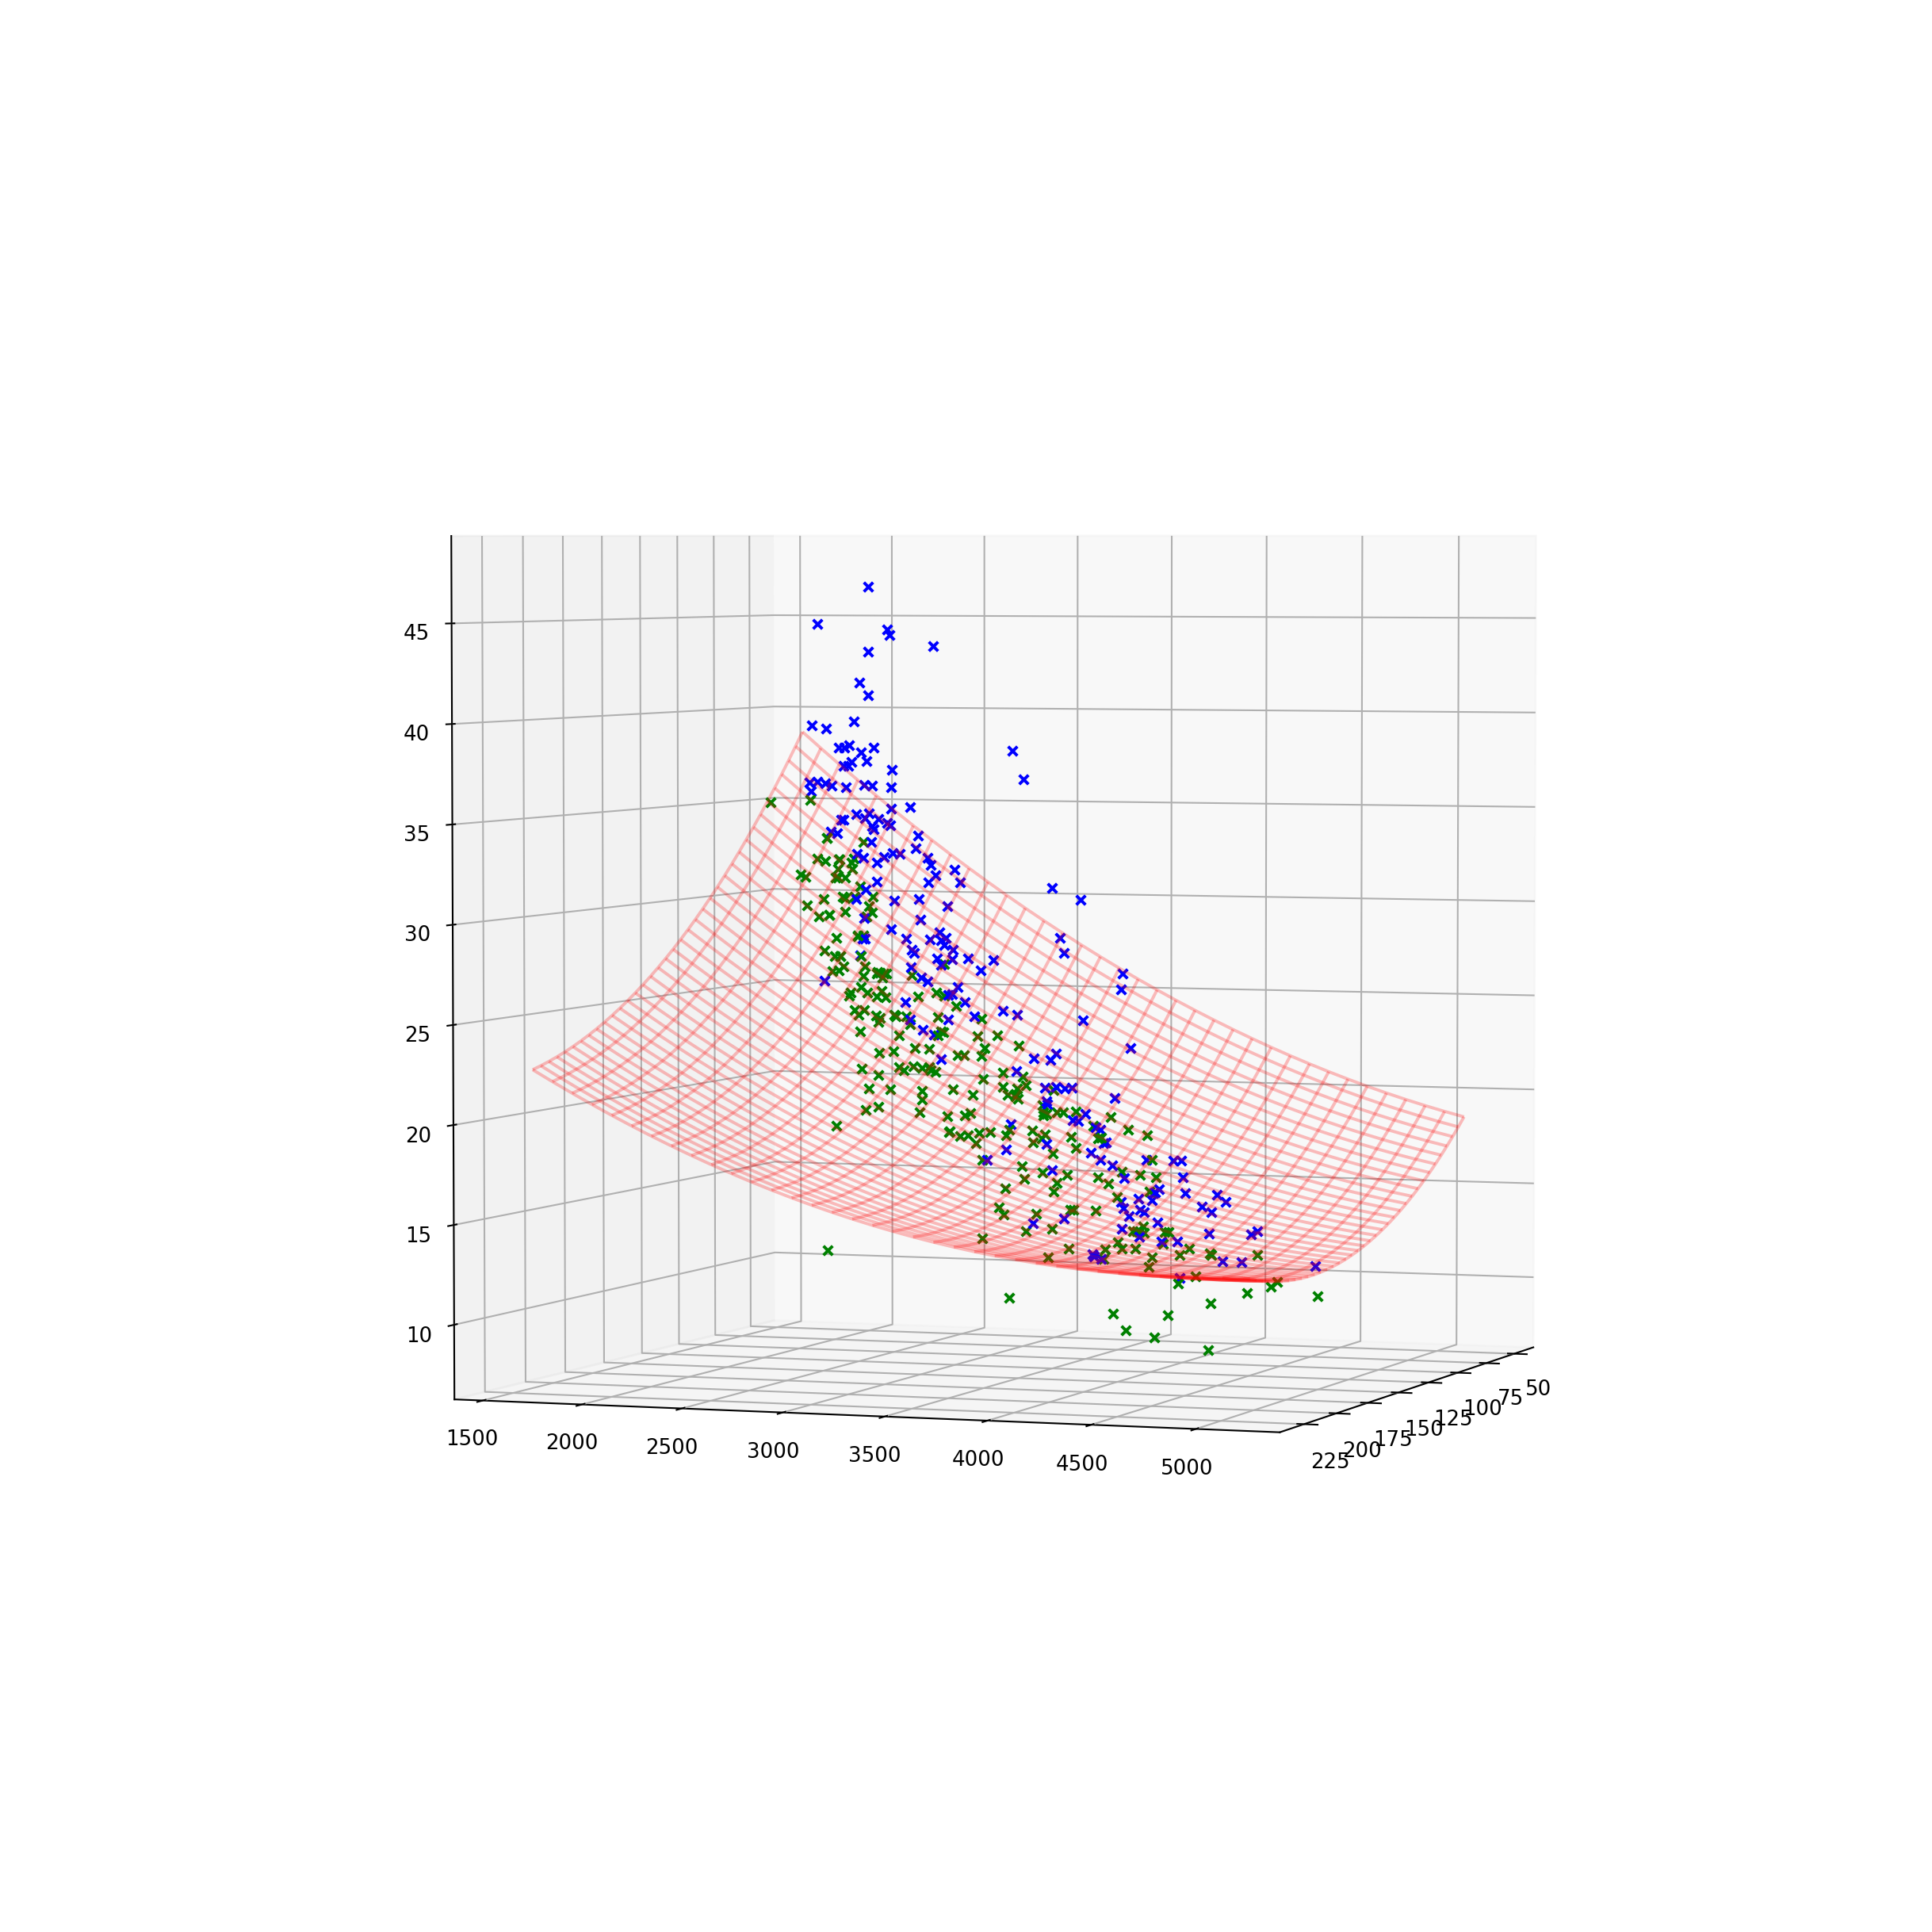

In [199]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 30)

pred = pipeline.predict(X)

# plot data points
for i in range(0, len(y)):
    if (y[i]-pred[i]<0):
        ax.scatter(X.iloc[i,0], X.iloc[i,1], y[i], color='green', marker='x')
    else:
        ax.scatter(X.iloc[i,0], X.iloc[i,1], y[i], color='blue', marker='x')

    
# plot hyperplane
X0 = np.arange(min(X.iloc[:,0]), max(X.iloc[:,0]), 5)
X1 = np.arange(min(X.iloc[:,1]), max(X.iloc[:,1]), 100)
X0, X1 = np.meshgrid(X0, X1)
Z = X0.copy()
n = X0.shape[0]
m = X0.shape[1]
for i in range(0, n):
    for j in range(0, m):
        Z[i,j] = pipeline.predict([[X0[i,j], X1[i,j]]])

#ax.scatter(X0, X1, Z, color='red')
#ax.plot_surface(X0, X1, Z, color='red', linewidth=0, antialiased=True, alpha=0.2)
ax.plot_wireframe(X0, X1, Z, color='red', alpha=0.25)

ax.view_init(3, 20)
plt.show()

# Evaluation / Risk of Overfitting

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

mean = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(df[['horsepower', 'weight']], df['mpg'])

    pipeline_of = make_pipeline(SimpleImputer(), 
                             PolynomialFeatures(5),
                             LinearRegression())


    pipeline_of.fit(X_train, y_train)
    score = pipeline_of.score(X_test, y_test)
    if (score > 0):
        mean.append(score)
    
print(np.mean(mean))

0.708788619316777


In [202]:
print("intercept: {}".format(pipeline_of.named_steps['linearregression'].intercept_))
print("slope: {}".format(pipeline_of.named_steps['linearregression'].coef_))

intercept: 41.81815042625118
slope: [ 0.00000000e+00 -9.05108375e-07  3.06898242e-07 -3.29185409e-05
 -4.67415170e-04  1.75786208e-05  3.92512345e-04 -3.73610330e-05
  1.47542462e-06 -2.66010353e-08  2.38046713e-06 -6.24156946e-07
  4.67578774e-08 -1.45043968e-09  1.79269052e-11 -1.16760998e-09
 -5.07351216e-10  1.36382472e-10 -1.00233463e-11  3.00144500e-13
 -3.36417675e-15]


<IPython.core.display.Javascript object>


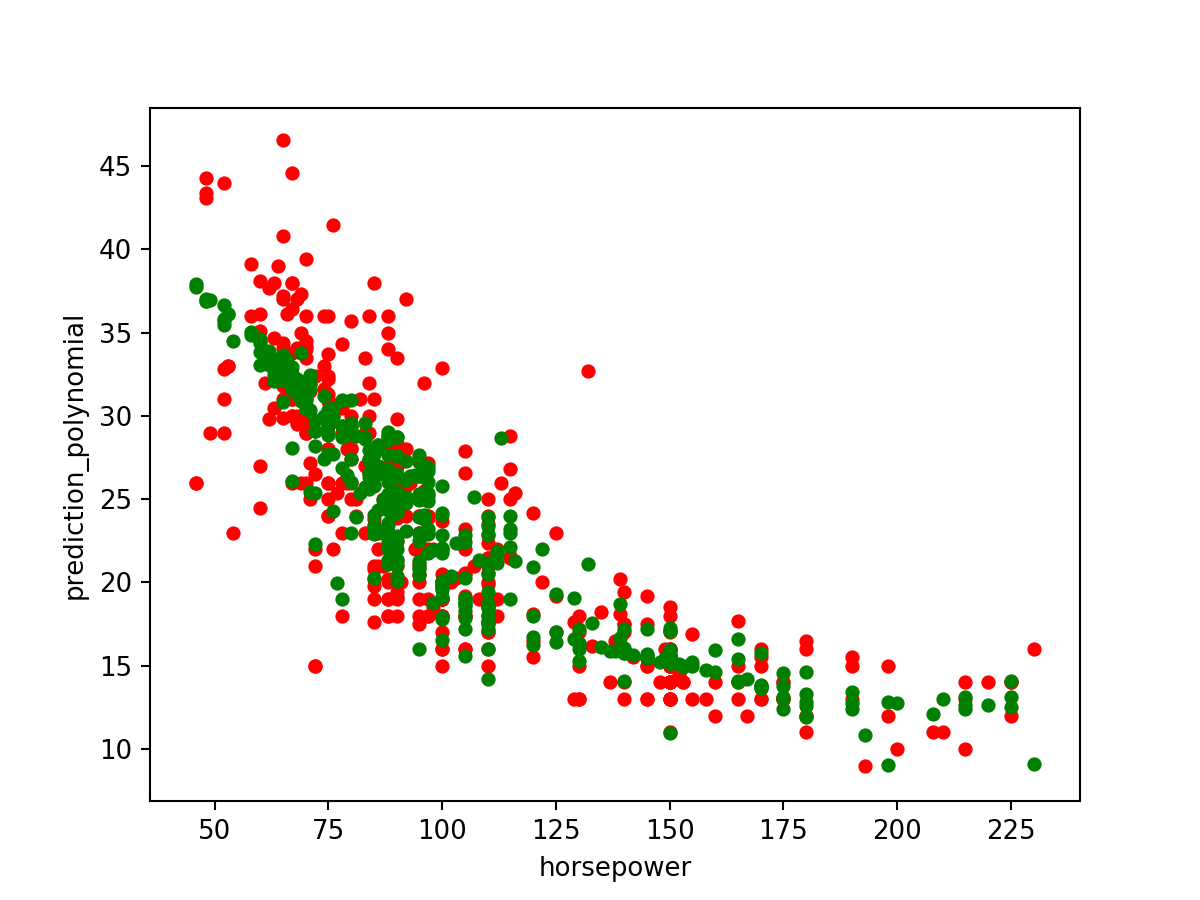

In [204]:
df_viz_of = df.copy()
df_viz_of['prediction_polynomial'] = pipeline_of.predict(X)
ax1 = df_viz_of.plot(kind='scatter', x='horsepower', y='mpg', color='r')    
ax2 = df_viz_of.plot(kind='scatter', x='horsepower', y='prediction_polynomial', color='g', ax=ax1)
plt.show()